# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">Predict Car brand ! 🚗</p>

![](https://cdn.luxe.digital/media/2020/12/15110747/fastest-cars-world-2021-luxe-digital%402x.jpg)

img url : https://luxe.digital/lifestyle/cars/fastest-cars/

This car, so awesome...

### I will try to predict the car brand using CNN model in keras.
### [Last work](https://www.kaggle.com/jeongbinpark/predict-the-car-brand-using-cnn), I fail to predict the car brand. 
### The last CNN model had 0.33 accuracy that to predict the 3 brand. 
### It's like only predict one brand.
### I think it occured that had little data. So, I will try predict the car brand with more data
---

# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;"> Import Libraries and Load dataset</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cv2

import keras
from keras import models, layers
from keras.utils import np_utils
from sklearn.model_selection import train_test_split


def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [2]:
#nạp dữ liệu
images = glob.glob('../input/the-car-connection-picture-dataset/*.jpg')
#Tạo một cấu trúc 2 chiều
data = pd.DataFrame(images, columns=['src'])
#áp dụng một hàm dọc theo một trong các trục của DataFrame
data['brand'] = data['src'].apply(lambda x : x.split('_')[0].split('/')[-1])
#đếm số lượng xe của từng hãng(chọn ra 3hãng đầu, nếu muốn thì thay đổi)
data['brand'].value_counts().head(3)

Chevrolet    5079
Toyota       4598
Ford         4416
Name: brand, dtype: int64

### This dataset have so many data, I tried to use all data, but It had some trouble that excess memory. 
### So, I will use only 3 brand Chevrolet, Toyota, Ford. They had most data

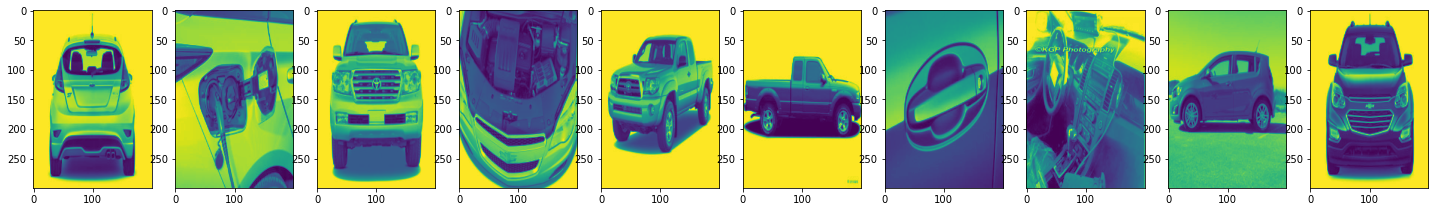

In [3]:
data = data[(data['brand']=='Chevrolet') |(data['brand']=='Toyota')|(data['brand']=='Ford')].reset_index(drop=True)
X= []
y= []
for i in range(len(data)):
    src = data.loc[i,'src']
    #đọc màu của ảnh
    src = cv2.imread(src, cv2.IMREAD_COLOR)
    #đổi ảnh về màu xám
    dst = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    #tọa độ khung ảnh
    X.append(cv2.resize(dst, dsize=(200, 300), interpolation=cv2.INTER_AREA))#x=200 y=300
    y.append(data.loc[i,'brand'])
    
fig, axes = plt.subplots(1,10,figsize=(25,10))
for i in range(0,10):
    axes[i].imshow(X[i])

In [4]:
y[:20]

['Ford',
 'Toyota',
 'Toyota',
 'Chevrolet',
 'Toyota',
 'Ford',
 'Toyota',
 'Ford',
 'Chevrolet',
 'Chevrolet',
 'Toyota',
 'Ford',
 'Chevrolet',
 'Chevrolet',
 'Ford',
 'Chevrolet',
 'Chevrolet',
 'Ford',
 'Toyota',
 'Chevrolet']

### I use gray color img. Because in last work, I realize that the color is not useful to predict car brand.
### And If use color img, It take so many times

# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;"> Feature engineering</p>

In [5]:
X = np.array(X)
X = X.astype('float32')
X = X /255.0
X = X.reshape(-1,300,200,1)
y= np.array(pd.get_dummies(pd.DataFrame(y),columns=[0]))

X.shape, y.shape

((14093, 300, 200, 1), (14093, 3))

## Changed the data to make model
1. Change the list to numpy array
2. Change the type int to float
3. Change the range 0 ~ 255 to 0 ~ 1
4. Change the shape (300,200) -> (300,200,1) to make model
5. Change the y data to categorical data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=100)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9865, 300, 200, 1), (4228, 300, 200, 1), (9865, 3), (4228, 3))

### And split the Data, X_train, X_test, y_train, y_test by using sklearn's train_test_split func

# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;"> Make CNN model</p>

In [7]:
input_shape = X_train.shape[1:]
model = models.Sequential()
model.add(layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = X_train.shape[1:]))
model.add(layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation = "softmax"))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size = 256, epochs = 12, shuffle=True, validation_data=(X_test,y_test),verbose = 0)


### To make model, I refer [Yassine Ghouzam's Notebook](https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6). 
### It very helpful for me. Thank you Yassine Ghouzam

# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;"> Evaluate the model</p>

In [8]:
#đánh giá tập test
model.evaluate(X_test, y_test)

133/133 [==============================] - 4s 25ms/step - loss: 1.2256 - accuracy: 0.7455


[1.2256087064743042, 0.7455061674118042]

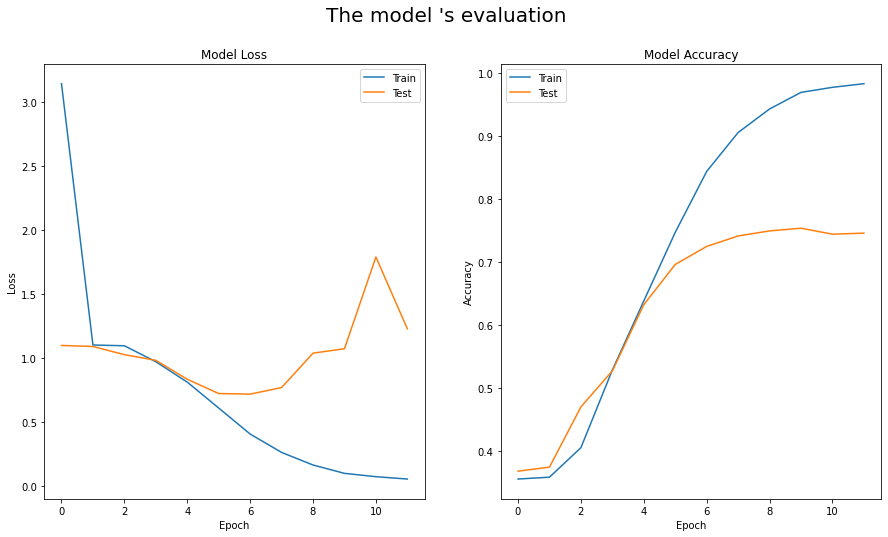

In [9]:
fig,axes = plt.subplots(1,2, figsize=(15,8))
fig.suptitle("The model 's evaluation ",fontsize=20)#fontsize là size của biểu đồ kết quả
axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_title('Model Loss')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train','Test'])


axes[1].plot(history.history['accuracy'])
axes[1].plot(history.history['val_accuracy'])
axes[1].set_title('Model Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train','Test'])
plt.show()
#kết quả đạt đc: Mô hình này cho thấy độ chính xác khoảng 0,76 trong dữ liệu thử nghiệm(biểu đồ bên phải)

### This model showed about 0.76 accuracy in test data

## Test data's img

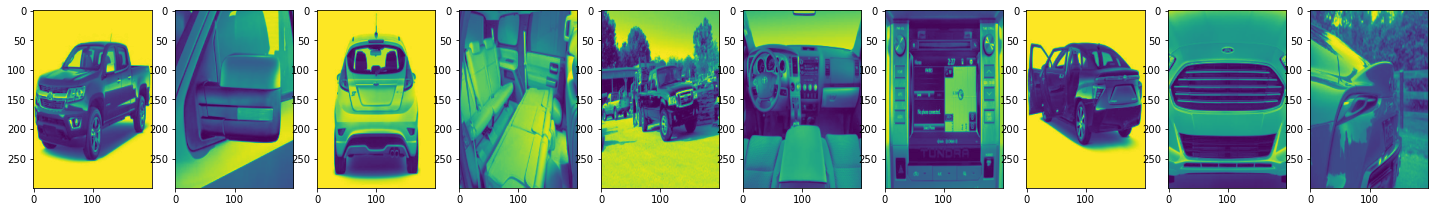

In [10]:
fig, axes = plt.subplots(1,10,figsize=(25,10))
for i in range(0,10):
    axes[i].imshow(X_test[i])

## Predict data

In [11]:
#predict data là dữ liệu dự đoán
pred = model.predict(X_test[:10])
pred = pd.DataFrame(pred).T.style.apply(highlight_max)
pred

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.000000,0.190321,0.000513,0.627209,0.000000,0.000005,0.000001,0.000237,0.924996
1,0.000000,0.999999,0.809668,0.000226,0.372791,0.000000,0.000000,0.000000,0.999712,0.023208
2,0.000000,0.000000,0.000011,0.999262,0.000000,1.000000,0.999995,0.999999,0.000050,0.051796


## Real data

In [12]:
#real data là dữ liệu thật
Real = pd.DataFrame(y_test[:10]).T

Real['brand'] =["Chevrolet",'Toyota','Ford']

Real.set_index('brand').style.apply(highlight_max)

,0,1,2,3,4,5,6,7,8,9
brand,,,,,,,,,,
Chevrolet,1,0,0,0,0,0,0,0,0,0
Toyota,0,1,1,0,1,0,0,0,1,0
Ford,0,0,0,1,0,1,1,1,0,1


# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;"> Thank you</p>

### If you have more good idea, Plz give me some comments ! 